In [1]:
import scipy
import time
from scipy.stats import norm, uniform
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.ndimage.filters import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from collections import namedtuple
import cProfile

In [2]:
# Sample Model Params
d_model = DataModel.sample_model()
xs, ys = d_model.sample()

In [1]:
# Plot Data Points
plt.figure(figsize=(25, 5))
plt.plot(xs, ys, 'b.', label='Simulated Data')

# Plot Smoothed Data Point Deltas
# ys_smooth = gaussian_filter(ys, 4)
# d_ys = ys_smooth[1:] - ys_smooth[:-1]
# scale, shift = 12, -8
# plt.plot(xs[:-1], d_ys*scale + shift, 'b.', label='Simulated Data Delta')
# plt.plot([xs[0], xs[-1]], [shift]*2, 'b--')

d_species_ys_total = np.zeros(len(ys)-1)
for i, d in enumerate(zip(d_model.stds, d_model.means, d_model.amps)):
    std, mean, amp = d
    label = 'True Species {}: std={:.3} mean={:.3} amp={:.3}'.format(i, std, mean, amp)
    species_ys = norm.pdf(xs, loc=mean, scale=std) * amp
    plt.plot(xs, species_ys, 'g--', label=label)

#     d_species_ys = species_ys[1:] - species_ys[:-1]
#     d_species_ys_total += d_species_ys
#     plt.plot(xs[:-1], d_species_ys*scale + shift, 'g--')

# plt.plot(xs[:-1], d_species_ys_total*scale + shift, 'g-', label='True Total Species Derivative')

plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [12]:
# Fit model to data

# i_pk = scipy.signal.find_peaks_cwt(y, widths=range(3,len(x)//Npks))
# DX = (np.max(x)-np.min(x))/float(Npks) # starting guess for component width
# guess = np.ravel([[x[i], y[i], DX] for i in i_pk]) # starting guess for (x, amp, width) for each component
guess_n = 5

# Initial Params
stds = [DataModel.std.mean()]*guess_n
means = np.linspace(DataModel.mean.ppf(.05), DataModel.mean.ppf(.95), guess_n)
amps = [DataModel.amp.mean()]*guess_n
initial_params = weave(stds, means, amps)
# Lower Bound
stds = [DataModel.std.ppf(0)]*guess_n
means = [DataModel.mean.ppf(0)]*guess_n
amps = [0]*guess_n
lower_bound = weave(stds, means, amps)
# Upper Bound
stds = [DataModel.std.ppf(1)]*guess_n
means = [DataModel.mean.ppf(1)]*guess_n
amps = [DataModel.amp.ppf(1)]*guess_n
upper_bound = weave(stds, means, amps)
# print(initial_params)
# print(lower_bound[:3])
# print(upper_bound[:3])
  
t0 = time.time()
fails = 0
while time.time() - t0 < 10:
    try:
        popt, pcov = curve_fit(gmm_f, xs, ys, p0=initial_params, bounds=(lower_bound, upper_bound))
        fit = GaussianMixtureModel(*unweave(popt, 3))
        print("RESULTS:", *unweave(popt, 3), sep="\n")
        break
    except RuntimeError as e:
        fails += 1
        print('F', end='')
print('FAILS:', fails)

RESULTS:
[0.86491854 0.86345819 0.45336798 0.73765494 0.73750792]
[ 5.          5.99423708 10.65149543 10.9326593  13.62279811]
[1.9557441  0.36549771 3.00800456 5.28436012 9.64103744]
FAILS: 0


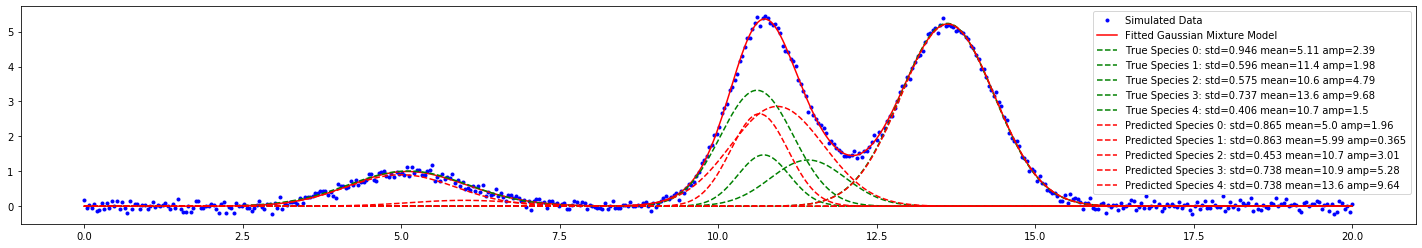

In [18]:
fit_ys = fit.f(xs)

plt.figure(figsize=(25, 4))
plt.plot(xs, ys, 'b.', label='Simulated Data')
plt.plot(xs, fit_ys, 'r', label='Fitted Gaussian Mixture Model')

for i, d in enumerate(zip(d_model.stds, d_model.means, d_model.amps)):
    

for i, d in enumerate(zip(fit.stds, fit.means, fit.amps)):
    std, mean, amp = d
    label = 'Predicted Species {}: std={:.3} mean={:.3} amp={:.3}'.format(i, std, mean, amp)
    species_ys = norm.pdf(xs, loc=mean, scale=std) * amp
    plt.plot(xs, species_ys, 'r--', label=label)

plt.legend()
plt.show()